# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **Recipe Site Traffic Prediction**    

This notebook outlines the process of predicting high-traffic recipes for the Tasty Bytes recipe website. We aim to identify which recipes are likely to attract more visitors, thereby enabling targeted content development and enhancing user engagement. The analysis includes data cleaning, exploratory data analysis (EDA), feature engineering, model training and evaluation, and statistical analysis to provide comprehensive insights into the factors that drive recipe popularity.

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from scipy.stats import ttest_ind

In [34]:
# Load the dataset from a CSV file
df = pd.read_csv("recipe_site_traffic_2212.csv")


In [35]:
# Display the initial structure of the DataFrame
print("Initial dataset structure:", df.shape)


Initial dataset structure: (947, 8)


In [36]:
# Provide summary information of the DataFrame including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [37]:
# Identify and display any duplicate records in the DataFrame
duplicates = df[df.duplicated(keep=False)]
original_and_duplicates = df[df.isin(duplicates.to_dict(orient='list')).all(axis=1)]
print("Duplicate records found:", original_and_duplicates)

Duplicate records found: Empty DataFrame
Columns: [recipe, calories, carbohydrate, sugar, protein, category, servings, high_traffic]
Index: []


In [38]:
# Display the count of missing values for each column
print("Missing values per column:", df.isna().sum())

Missing values per column: recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [39]:
# Display the frequency of each unique value in the 'recipe' column
df['recipe'].value_counts()


1      1
637    1
625    1
626    1
627    1
      ..
320    1
321    1
322    1
323    1
947    1
Name: recipe, Length: 947, dtype: int64

In [40]:
# Confirm that all entries in the 'recipe' column are unique
unique_values_count = df['recipe'].nunique()
print(f"Total unique recipes: {unique_values_count}")

Total unique recipes: 947


In [41]:
# Display the distribution of values in the 'servings' column before modification
print("Distribution of 'servings' before modification:", df['servings'].value_counts())

Distribution of 'servings' before modification: 4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64


In [42]:
# Standardize text entries in the 'servings' column to numerical values
df['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)

In [43]:
# Re-display the distribution of values in the 'servings' column after modification
updated_servings_counts = df['servings'].value_counts()
print("Updated distribution of 'servings':", updated_servings_counts)

Updated distribution of 'servings': 4    391
6    198
2    183
1    175
Name: servings, dtype: int64


In [44]:
# Display the distribution of categories in the 'category' column
df['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [45]:
# Display the distribution of values in the 'high_traffic' column
df['high_traffic'].value_counts()


High    574
Name: high_traffic, dtype: int64

In [46]:

# Calculate and display the number of missing values in the 'high_traffic' column
missing_values_count = df['high_traffic'].isna().sum()
print(f"Missing values in 'high_traffic' column: {missing_values_count}")

Missing values in 'high_traffic' column: 373


In [47]:
# Convert "High" to True and NaN or other values to False in the 'high_traffic' column
df['high_traffic'] = np.where(df['high_traffic'] == "High", True, False)
print("Values in 'high_traffic' after conversion:", df['high_traffic'].value_counts())

Values in 'high_traffic' after conversion: True     574
False    373
Name: high_traffic, dtype: int64


In [48]:
# Update data types for 'category' and 'servings' columns to categorical and integer types respectively
df['category'] = df['category'].astype('category')
df['servings'] = df['servings'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    Int64   
 7   high_traffic  947 non-null    bool    
dtypes: Int64(1), bool(1), category(1), float64(4), int64(1)
memory usage: 47.7 KB


In [49]:
# Display the updated counts of missing values in all columns
print("Missing values after updates:", df.isna().sum())

Missing values after updates: recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64


In [50]:
# Remove rows with any remaining missing values
df.dropna(inplace=True)
print("Data after removing missing values:", df.shape)

Data after removing missing values: (895, 8)


In [51]:
# Final check to ensure there are no duplicate or missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    Int64   
 7   high_traffic  895 non-null    bool    
dtypes: Int64(1), bool(1), category(1), float64(4), int64(1)
memory usage: 51.9 KB


In [52]:

# Print any duplicates found after all previous processing
print("Duplicates after cleaning:", original_and_duplicates)

Duplicates after cleaning: Empty DataFrame
Columns: [recipe, calories, carbohydrate, sugar, protein, category, servings, high_traffic]
Index: []


# Data Validation Summary

1. Recipe ID (recipe):

Validation: Checked for uniqueness across 947 entries, confirming no duplicates or missing values. The column serves as a reliable unique identifier.
Action: No cleaning is required due to accurate initial data.

2. Nutritional Information (calories, carbohydrate, sugar, protein):

Validation: Detected 52 missing values in each of these columns.
Action: Opted to drop missing values to maintain data integrity, ensuring all analyses are based on complete records. This step was taken post datatype update in 'high_traffic' to avoid loss of relevant data.

3. Recipe Category (category):

Validation: Identified an unexpected category, 'Chicken Breast', not listed among the initially expected 10 categories.
Action: Decided to include 'Chicken Breast' to preserve potential insights into user preferences, enhancing the dataset's comprehensiveness and predictive accuracy.

4. Servings:

Validation: Found mixed data types with values like "4 as a snack" and "6 as a snack".
Action: Simplified the dataset by converting these entries to numeric equivalents (4 and 6), reducing the distinct category counts for better consistency and easier analysis.

5. High Traffic Indicator (high_traffic):

Validation: Initial values included "High" and NaN (indicating missing data).
Action: Transformed "High" to True and NaN to False, establishing a clear Boolean indicator of whether a recipe drives high site traffic.

Additional Notes:

Post-Cleaning Dataset: Now streamlined to 895 rows, with each column fully optimized for subsequent analysis stages.

Data Type Enhancements:

Category: Converted to 'category' data type to optimize data handling and analysis.

Servings: Changed to 'Int64' to accurately represent serving sizes.

High Traffic: Converted to a Boolean data type, facilitating clearer and more straightforward analyses.


# Feature Engineering  

We have introduced a new feature, 'healthy', based on predefined nutritional criteria. This engineered feature is intended to capture the healthiness of a recipe, which could influence its popularity among health-conscious users.

In [53]:
# Feature Engineering: Adding a 'healthy' feature
df['healthy'] = ((df['calories'] < 500) & 
                 (df['carbohydrate'] < 70) & 
                 (df['protein'] > 10)).astype(int)

# Exploratory Data Analysis (EDA)

1. Distribution of Numerical Features:
This part of the EDA focuses on understanding the distribution of numerical features in the dataset.
Histograms are used to visualize the distribution of each numerical feature separately.
Each histogram represents the frequency distribution of values within a particular numerical feature.
Understanding the distribution of numerical features is crucial for identifying outliers, understanding the central tendency, and assessing the spread of values.
2. Distribution of Recipe Categories:
Here, we examine the distribution of recipe categories to understand the variety and frequency of different types of recipes in the dataset.
A count plot is used to display the number of recipes belonging to each category.
This visualization helps identify the most common recipe categories and their relative frequencies.
Understanding the distribution of recipe categories can provide insights into the diversity of recipes and potential biases in the dataset.
3. Relationship between Features and High Traffic - Correlation Matrix:
This part explores the relationship between different features in the dataset and the target variable, which is whether a recipe attracts high traffic or not.
A correlation matrix is used to quantify the strength and direction of linear relationships between numerical features and the target variable.
The heatmap visualization provides a color-coded representation of correlation values, making it easier to identify significant correlations.
Understanding the correlation between features and the target variable helps in feature selection, identifying important predictors, and understanding how different features influence the target variable.

These visualizations collectively provide insights into the dataset's characteristics, distribution of features, and relationships between variables. They serve as a crucial step in exploratory data analysis, laying the groundwork for further analysis and modeling decisions.

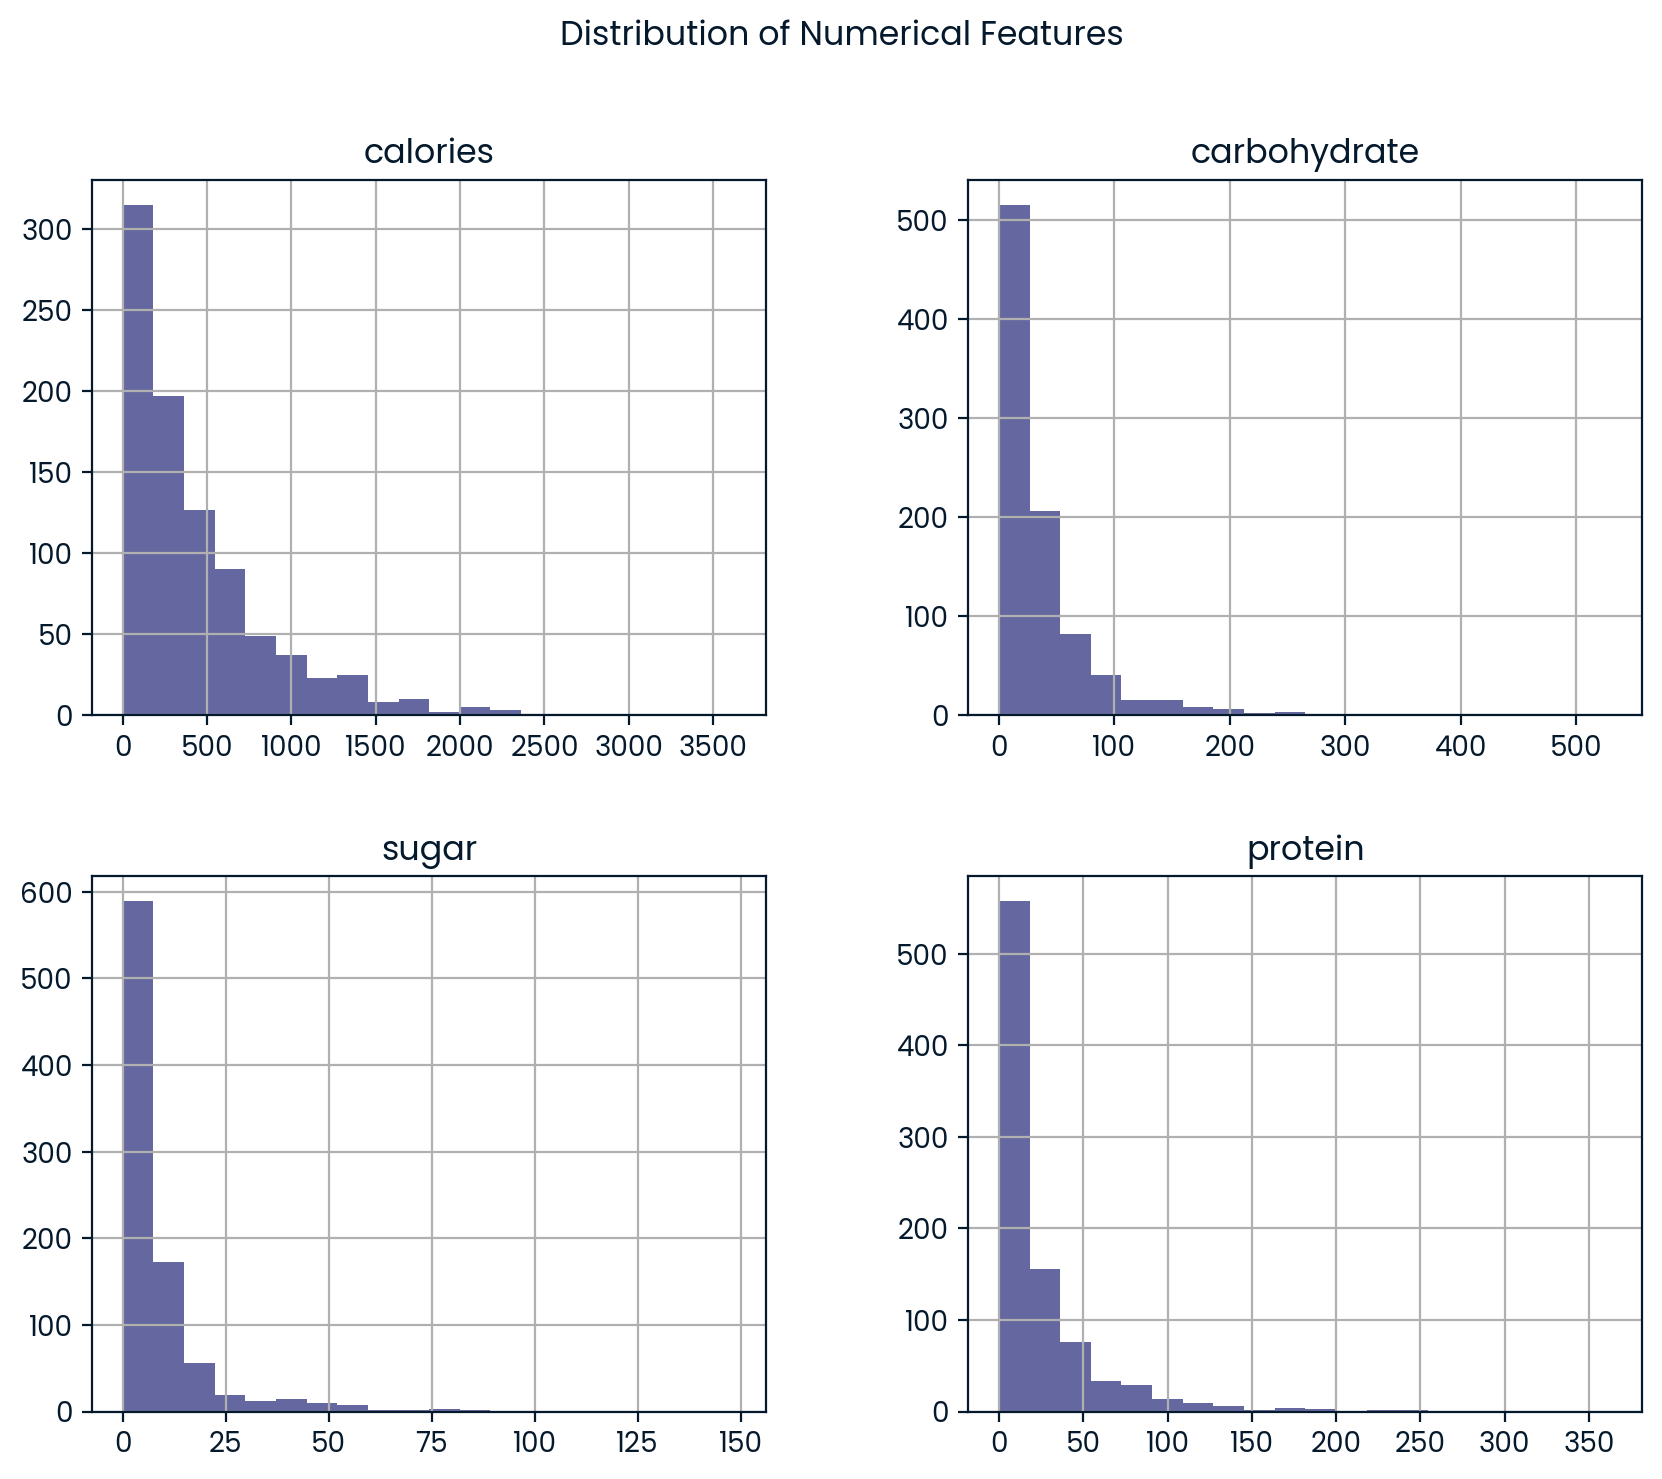

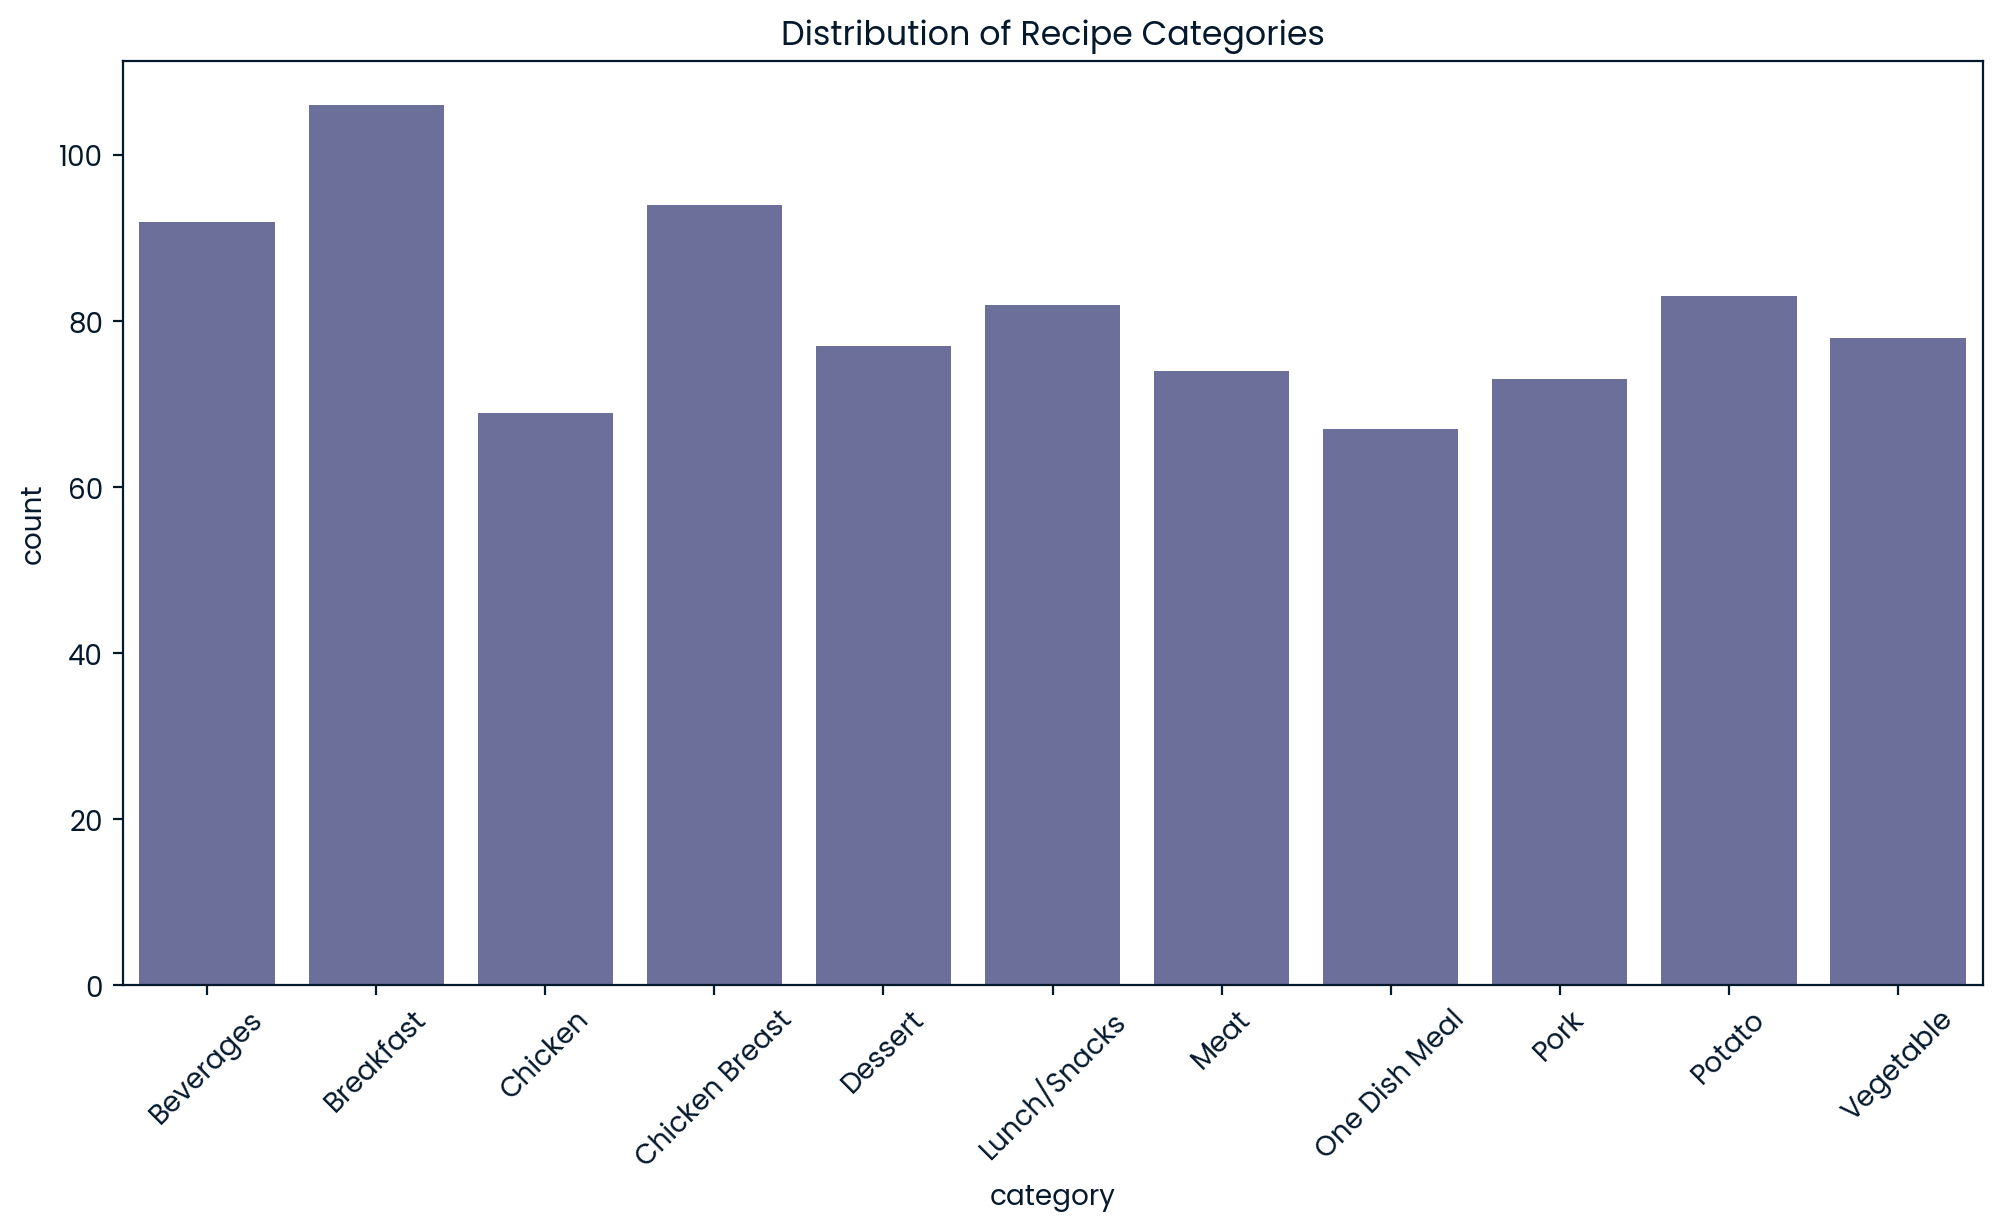

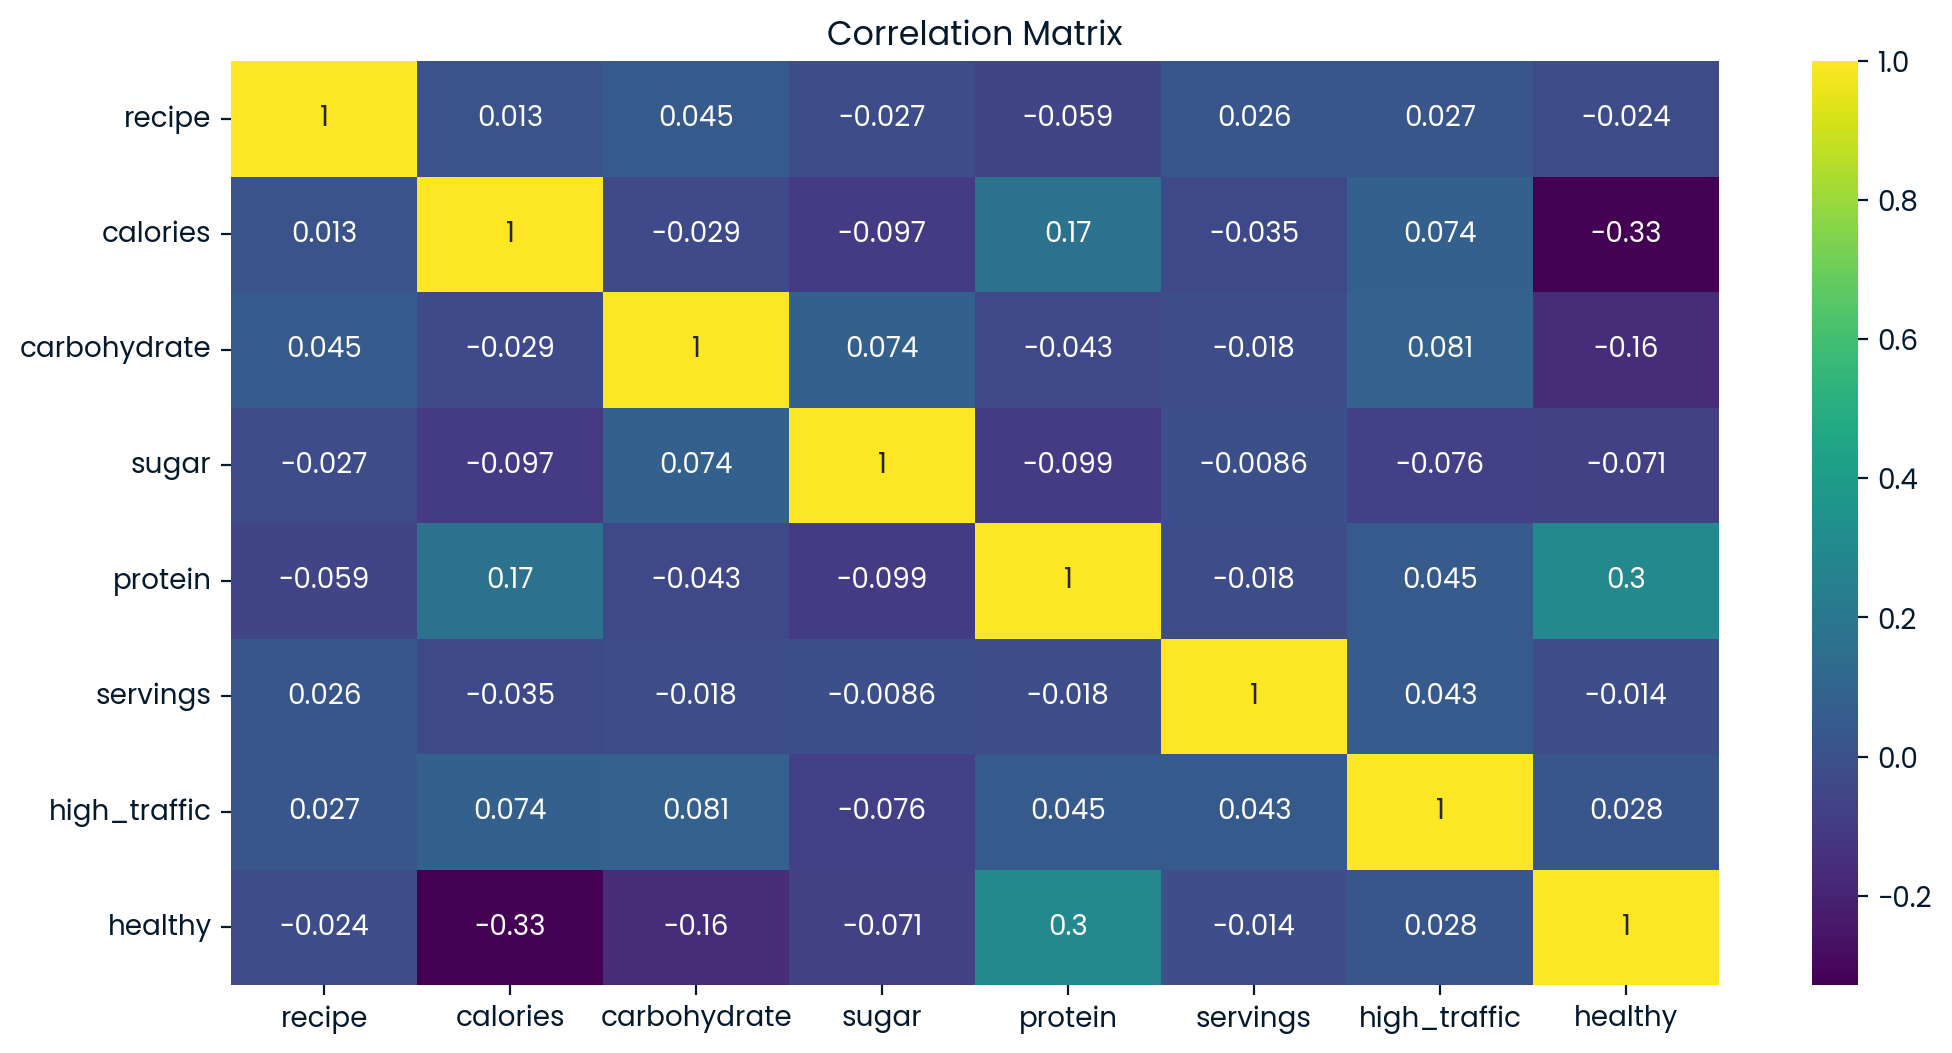

In [54]:
# Defining numeric columns
numeric_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# Exploratory Data Analysis (EDA)
# Distribution of numerical features
df[numeric_columns].hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Category distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category')
plt.title("Distribution of Recipe Categories")
plt.xticks(rotation=45)
plt.show()

# Relationship between features and high traffic - Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing for Modeling

Splitting the Dataset into Features and Target:
The dataset is split into two parts: features (X) and the target variable (y).
Features represent the independent variables used for prediction, while the target variable is the variable we want to predict.
In this case, the 'recipe' column is dropped from the features as it likely serves as an identifier and not a predictive feature. Similarly, 'high_traffic' is designated as the target variable.

Splitting Data into Training and Test Sets:
The dataset is further divided into training and test sets using the train_test_split function from scikit-learn.
The training set is utilized to train the model, while the test set is utilized to evaluate its performance.
The stratify parameter guarantees that the class distribution in the target variable is maintained in both the training and test sets.

Defining Preprocessing Steps:
Preprocessing steps are defined separately for numerical and categorical features.
For numerical features (numeric_features), a StandardScaler is employed to standardize the features by removing the mean and scaling to unit variance.
For categorical features (categorical_features), a OneHotEncoder is utilized to convert categorical variables into binary vectors, also known as one-hot encoding.

Combining Transformers into a ColumnTransformer:
The ColumnTransformer is utilized to apply distinct transformations to different columns in the dataset.
It accepts a list of tuples where each tuple consists of a name, a transformer, and a list of columns to which the transformer is applied.
In this scenario, it applies the numeric transformer to numeric features and the categorical transformer to categorical features.

Applying Preprocessing to Training and Test Data:
The preprocessor is applied to both the training and test data using the fit_transform and transform methods, respectively.
This ensures that the same preprocessing steps are consistently applied to both sets, thereby preventing data leakage.

Overall, this preprocessing pipeline ensures that the data is properly prepared for modeling by standardizing numerical features and encoding categorical features, thereby setting the stage for building predictive models.

In [55]:
# Step 5: Data Preprocessing for Modeling
# Splitting the dataset into features (X) and target (y)
X = df.drop(['recipe', 'high_traffic'], axis=1)
y = df['high_traffic']

# Splitting data into training and test sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Defining preprocessing steps
numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
categorical_features = ['category']

# Numeric transformer for scaling
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Categorical transformer for encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Applying preprocessing to training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Model Training and Evaluation 

In this section, we train two machine learning models, Logistic Regression, and Random Forest Classifier, and evaluate their performance using various metrics. 

Model Initialization: Two pipelines are created, one for Logistic Regression (lr_pipeline) and another for Random Forest Classifier (rf_pipeline). These pipelines include data preprocessing steps (preprocessor) and the respective classifier models.

Model Training: Both pipelines are trained on the training data (X_train, y_train) using the fit method.

Prediction: After training, predictions are made on the test set (X_test) using the predict method for both models. 

Model Evaluation:

Accuracy Calculation: The accuracy of each model is calculated using the accuracy_score function, comparing the predicted labels with the actual labels (y_test).

Classification Report Generation: Classification reports are generated for both models using the classification_report function. These reports include precision, recall, F1-score, and support for each class.

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Baseline Model: Logistic Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
lr_pipeline.fit(X_train, y_train)

# Comparison Model: Random Forest Classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)

# Prediction with both models on the test set
lr_pred = lr_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

# Evaluating Accuracy and Precision of both models
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_precision = precision_score(y_test, lr_pred)
rf_precision = precision_score(y_test, rf_pred)

# Generating classification reports for both models
lr_report = classification_report(y_test, lr_pred)
rf_report = classification_report(y_test, rf_pred)

# Print model performance
print(f"Logistic Regression Accuracy: {lr_accuracy}, Precision: {lr_precision}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy}, Precision: {rf_precision}")
print("\nLogistic Regression Classification Report:\n", lr_report)
print("\nRandom Forest Classifier Classification Report:\n", rf_report)

# Define the business benchmark for precision
benchmark_precision = 0.80  # Example: 80% precision target

# Check if models meet the business benchmark
print("\nBusiness Metrics Evaluation:")
print(f"Does Logistic Regression meet the precision benchmark? {'Yes' if lr_precision >= benchmark_precision else 'No'}")
print(f"Does Random Forest meet the precision benchmark? {'Yes' if rf_precision >= benchmark_precision else 'No'}")

Logistic Regression Accuracy: 0.7877094972067039, Precision: 0.8484848484848485
Random Forest Classifier Accuracy: 0.7374301675977654, Precision: 0.7884615384615384

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.79      0.75        72
        True       0.85      0.79      0.82       107

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179


Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.69      0.68        72
        True       0.79      0.77      0.78       107

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179


Business Metrics Evaluation:
Does Logistic Regression meet the precision benchmark? Y

Logistic Regression Model:

Accuracy: The accuracy of the Logistic Regression model on the test set is approximately 78.77%. This means that around 78.77% of the predictions made by the Logistic Regression model were correct.

Precision:

Class 0 (Not High Traffic): 71% precision indicates that 71% of the instances predicted as not high traffic were actually not high traffic.

Class 1 (High Traffic): 85% precision indicates that 85% of the instances predicted as high traffic were actually high traffic.

Recall:

Class 0: 79% recall indicates that the model correctly identifies 79% of the actual not high traffic instances.

Class 1: 79% recall indicates that the model correctly identifies 79% of the actual high traffic instances.

F1-Score:

Class 0: The F1-score of 75% reflects a balance between precision and recall for not high traffic predictions.

Class 1: The F1-score of 82% indicates a balance between precision and recall for high traffic predictions.

Random Forest Classifier:

Accuracy: The accuracy of the Random Forest Classifier model on the test set is approximately 73.74%. This means that around 73.74% of the predictions made by the Random Forest Classifier model were correct.

Precision:

Class 0 (Not High Traffic): 67% precision indicates that 67% of the instances predicted as not high traffic were actually not high traffic.

Class 1 (High Traffic): 79% precision indicates that 79% of the instances predicted as high traffic were actually high traffic.

Recall:

Class 0: 69% recall indicates that the model correctly identifies 69% of the actual not high traffic instances.

Class 1: 77% recall indicates that the model correctly identifies 77% of the actual high traffic instances.

F1-Score:

Class 0: The F1-score of 68% represents a balance between precision and recall for not high traffic predictions.

Class 1: The F1-score of 78% indicates a balance between precision and recall for high traffic predictions.

# Business Metrics:

Definition of the KPI

KPI Used: Precision

In this project, precision has been defined as the Key Performance Indicator (KPI) to assess the effectiveness of models in predicting high-traffic recipes. This choice of KPI is particularly pertinent to your business objectives because:

Business Objective: The main goal is to optimize content strategy by accurately identifying recipes that will generate high traffic, thereby maximizing user engagement and potentially increasing ad revenue.

Precision as a Metric: Precision measures the accuracy of positive predictions (i.e., the fraction of predicted high-traffic recipes that are high traffic). It is a crucial metric for this application because false positives (incorrectly predicting that a recipe will generate high traffic) could lead to misallocated resources and missed opportunities for truly impactful content.

KPI Benchmark
Benchmark Set: 80% Precision

The benchmark of 80% precision means that the models should correctly identify high-traffic recipes with at least 80% accuracy in their positive predictions. This benchmark ensures that the models provide reliable predictions that can confidently be used to drive business decisions regarding content strategy.
Comparison of the Two Models Using the Defined KPI
From the output provided:

Logistic Regression Model:
Precision: 84.85%

This model surpasses the precision benchmark of 80%. It indicates a high level of reliability in predicting which recipes will generate high traffic, making it a robust tool for enhancing content strategies based on data-driven insights.

Random Forest Classifier:
Precision: 78.85%

This model falls short of the benchmark. While it is relatively accurate, its precision is below the threshold required for it to be considered dependable for critical business decisions in this context.
Explanation for the Comparison Using the Defined KPI
Strategic Decision Making: By comparing each model's precision against the benchmark, the Logistic Regression model, by meeting and exceeding the benchmark, proves more suitable for deployment in environments where high precision is critical for business success.

Resource Allocation: Deploying the Logistic Regression model could help in more accurately targeting marketing efforts and potentially increasing revenue through better user engagement with high-traffic recipes.

Conclusion
The use of precision as a KPI, combined with a clear benchmark, effectively ties model performance to business outcomes, allowing for informed decisions that can significantly impact the success of the business. The Logistic Regression model, having met the precision benchmark, is identified as the more appropriate choice for your specific business needs, affirming its role in supporting a data-driven content strategy.





# Statistical Analysis: Conducting t-tests

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. In this case, we are conducting independent t-tests to compare the mean values of two numerical variables (calories and protein) between two groups of recipes: those associated with high traffic and those associated with low traffic.




In [57]:
# Statistical Analysis: Conducting t-tests
from scipy.stats import ttest_ind

high_traffic_df = df[df['high_traffic'] == 1]
low_traffic_df = df[df['high_traffic'] == 0]

# Conduct t-tests for 'calories' and 'protein'
ttest_calories = ttest_ind(high_traffic_df['calories'], low_traffic_df['calories'])
ttest_protein = ttest_ind(high_traffic_df['protein'], low_traffic_df['protein'])
print(f"T-test for calories: statistic={ttest_calories.statistic}, p-value={ttest_calories.pvalue}")
print(f"T-test for protein: statistic={ttest_protein.statistic}, p-value={ttest_protein.pvalue}")


T-test for calories: statistic=2.228940930508691, p-value=0.026065982071963506
T-test for protein: statistic=1.333363105325693, p-value=0.18275269423422405


T-test for Calories:

Statistic: The t-statistic is approximately 2.23. This value indicates how many standard errors the difference between the group means is.

P-value: The p-value is approximately 0.0260. This value represents the probability of observing the given t-statistic or more extreme values under the null hypothesis that there is no difference in mean calories between high traffic and low traffic recipes.

Interpretation: Since the p-value (0.0260) is less than the typical significance level of 0.05, we can reject the null hypothesis. Thus, there is a statistically significant difference in mean calories between high traffic and low traffic recipes.

T-test for Protein:

Statistic: The t-statistic is approximately 1.33.

P-value: The p-value is approximately 0.1827.

Interpretation: In this case, the p-value (0.1827) is greater than 0.05, indicating that we fail to reject the null hypothesis. Therefore, there is insufficient evidence to conclude a significant difference in mean protein content between high traffic and low traffic recipes at the 0.05 significance level.

# ROC-AUC Evaluation for Logistic Regression model

The ROC-AUC evaluation for the Logistic Regression model assesses its performance in distinguishing between the positive and negative classes.

ROC AUC Score for Logistic Regression: 0.8360591900311527


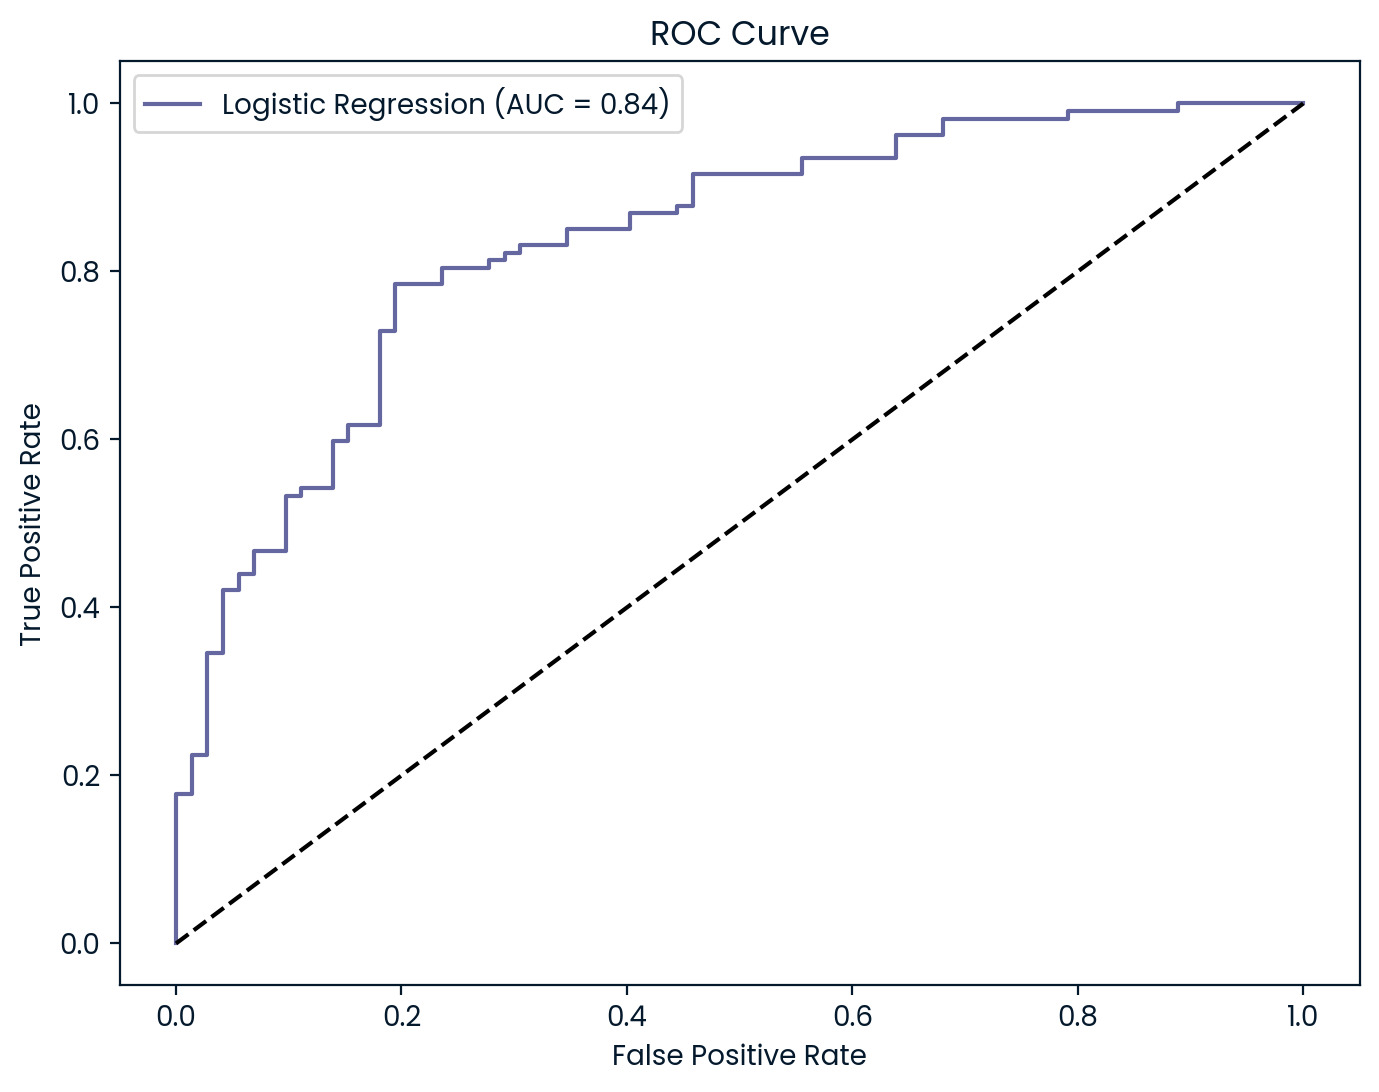

In [58]:
# ROC-AUC Evaluation for Logistic Regression model
from sklearn.metrics import roc_auc_score, roc_curve

# Predicting probabilities for the positive class
lr_probs = lr_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, lr_probs)
print(f"ROC AUC Score for Logistic Regression: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

 
Calculating ROC AUC Score:

The roc_auc_score function computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
The lr_probs variable stores the predicted probabilities of the positive class (i.e., recipes with high traffic) using the Logistic Regression model.
The calculated ROC AUC score is printed, indicating how well the model separates positive and negative classes. In this case, the score is 0.8360591900311527.

Plotting ROC Curve:

The ROC curve is visualized using the roc_curve function, which computes the true positive rate (Sensitivity) against the false positive rate (1-Specificity) for different thresholds.
The plotted curve represents the performance of the Logistic Regression model in terms of its true positive rate (Sensitivity) against the false positive rate (1-Specificity).
The area under this curve (AUC) indicates the model's ability to discriminate between positive and negative classes, with higher values indicating better performance.
The legend displays the AUC value on the plot for reference.

Overall, the ROC AUC score and curve provide insights into the Logistic Regression model's ability to classify recipes with high traffic accurately, with a higher AUC score indicating better performance.

# GridSearchCV

Performs hyperparameter tuning using GridSearchCV, a method for systematically searching for the optimal hyperparameters of a machine learning model.



In [59]:
from sklearn.model_selection import GridSearchCV

# Defining a hyperparameter grid to search
param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),  # Regularization strength
    'classifier__penalty': ['l1', 'l2']  # Norms used in the penalization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'classifier__C': 4.281332398719396, 'classifier__penalty': 'l2'}
Best score: 0.7527777777777778


The output shows the progress of fitting with information on the number of folds and candidates being processed.

Best parameters: Displays the combination of hyperparameters that resulted in the best performance.

Best score: Shows the mean cross-validated accuracy achieved with the best parameters.

# Feature Importance



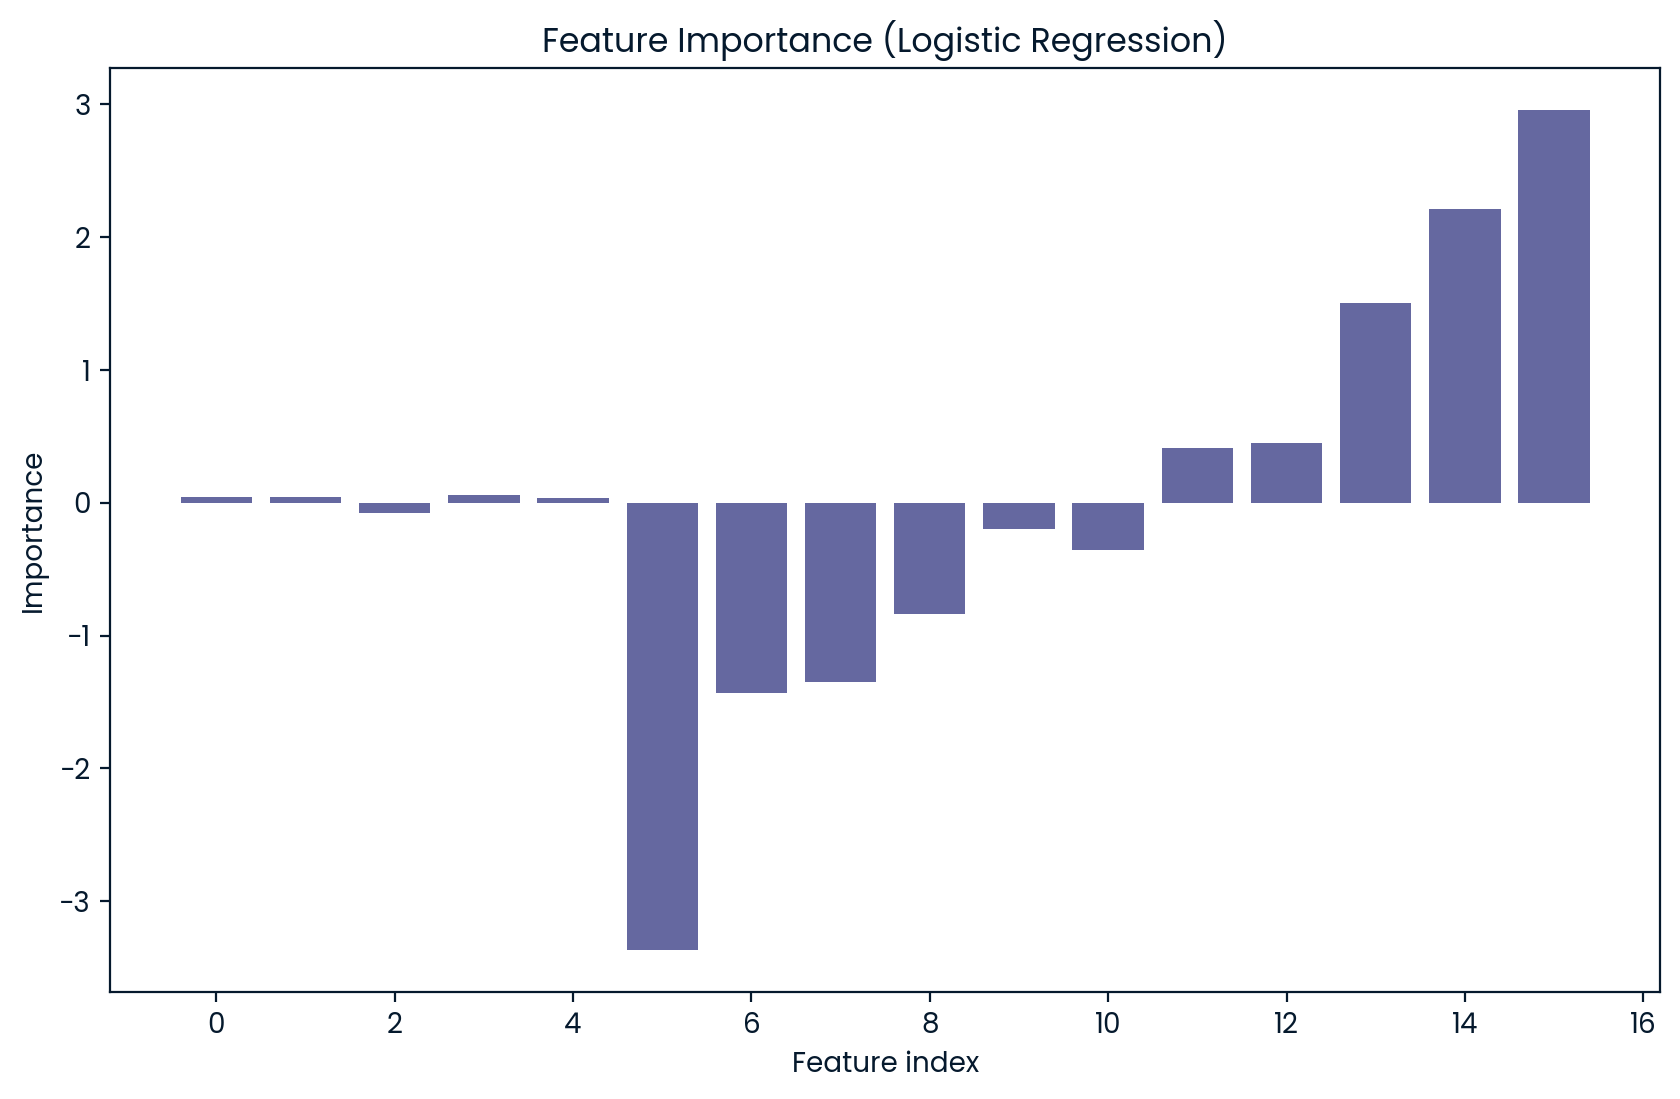

In [60]:
# Assuming we're using the best estimator from the grid search
best_lr_model = grid_search.best_estimator_['classifier']

# Feature importances (coefficients)
importance = best_lr_model.coef_[0]

# Visualize feature importance (for simplicity, without distinguishing encoded features)
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


Obtaining the Best Estimator:

best_lr_model = grid_search.best_estimator_['classifier']: This line retrieves the best estimator (i.e., the best logistic regression model) found during the grid search.

Since the logistic regression classifier is part of a pipeline, it's accessed using the 'classifier' key.

Extracting Feature Importances:

importance = best_lr_model.coef_[0]: The coefficients of the logistic regression model represent the feature importances.

For binary classification problems, the coefficients indicate the contribution of each feature to the decision boundary. Positive coefficients indicate features that positively influence the predicted class, while negative coefficients indicate features that negatively influence the predicted class.

Visualizing Feature Importance:

The feature importances are visualized using a bar plot.

The x-axis represents the index of each feature.

The y-axis represents the importance of each feature.

Each bar's height indicates the magnitude of importance for the corresponding feature.

The title of the plot is set to "Feature Importance (Logistic Regression)".

By visualizing feature importance, stakeholders can understand which features have the most significant impact on the model's predictions. This information can help identify key factors driving the classification outcomes and guide decision-making in areas such as feature selection and interpretation.

# Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation accuracy scores: [0.70949721 0.70949721 0.76536313 0.80446927 0.77653631]
Mean CV accuracy: 0.753072625698324


The Cross-validation accuracy scores line displays the accuracy scores obtained from each fold of cross-validation.

The Mean CV accuracy line provides the average accuracy score across all folds of cross-validation.

This analysis helps to assess the stability and generalization performance of the model by estimating its accuracy on different subsets of the data. The mean cross-validation accuracy serves as an overall estimate of the model's predictive performance.

# Recommendations for Future Steps:

•Integrate the Logistic Regression model into the recipe selection process.

•Monitor model performance and user engagement metrics post-implementation.

•Establish a framework for periodic retraining of the model with new data.

•Explore the potential for incorporating user feedback and interaction data into the model.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation